In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
books = pd.read_csv('book.csv')

In [3]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
frequent_items = apriori(books, min_support = 0.005,max_len = 3, use_colnames = True)

In [5]:
# Most frequent items set based on support  
frequent_items.sort_values('support',ascending= False, inplace = True)

In [6]:
#Building the rules
rules = association_rules(frequent_items,metric="lift",min_threshold = 1)

In [7]:
#The above code gives us the rules with threshold greater than 1
rules.sort_values('lift', ascending = False, inplace = True)

In [8]:
# To eliminate the reducdancy in rules
def to_list(i):
    return sorted(i)

In [10]:
ma_x = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

ma_x = ma_x.apply(sorted)

return_rules = list(ma_x)
unique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]

index_rules = []
for i in unique_rules:
    index_rules.append(return_rules.index(i))

In [11]:
#Getting the rules without any reducdancies
rules_without_reducdancies = rules.iloc[index_rules, : ]

In [12]:
#Sorting them with respect to lift 
rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)

C:\Users\Harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
749,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
752,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
742,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
747,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
350,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
355,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
561,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
564,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
920,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306
925,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939


In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
support = rules_without_reducdancies["support"]
confidence = rules_without_reducdancies["confidence"]
lift = rules_without_reducdancies["lift"]

Text(0.5, 0, 'lift')

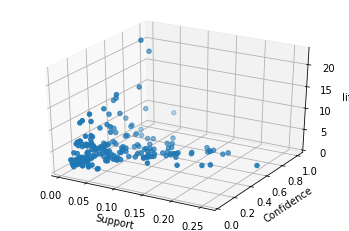

In [16]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

In [17]:
# Changing the support value to 0.007
frequent_items1 = apriori(books,min_support = 0.007,max_len = 4 , use_colnames = True)

#Most frequent items based on the support, decending order
frequent_items1.sort_values('support', ascending = False, inplace = True)

In [18]:
#Building rules
rules2 = association_rules(frequent_items1 , metric = 'lift' , min_threshold = 1)

#Rules2 are the rules which are generated with the minimum threshold as 1
rules2.sort_values('lift',ascending = False , inplace = True)

In [20]:
#Elimiinating the reducdancies
def to_list1(i):
    return(sorted(i))

In [21]:
ma_x1 = rules2.antecedents.apply(to_list1)+ rules2.consequents.apply(to_list1)

ma_x1 = ma_x1.apply(sorted)

return_rules1 = list(ma_x1)
unique_rules1 = [list(m) for m in set(tuple(i) for i  in return_rules1 )]

index_rules1 = []
for i in unique_rules1:
    index_rules1.append(return_rules1.index(i))

In [22]:
# eliminate rules with reducdancies 
rules_without_reduc = rules2.iloc[index_rules1,:]

##Sorting the rules
rules_without_reduc.sort_values('lift', ascending = False, inplace = True)
### A Total of 459 rules

C:\Users\Harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 0, 'lift')

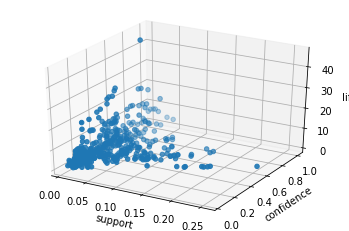

In [23]:
support2 = rules_without_reduc["support"]
confidence2 =  rules_without_reduc["confidence"]
lift2 = rules_without_reduc["lift"]


fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support2,confidence2,lift2)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")